In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [66]:
df=pd.read_csv('http://taanila.fi/AirPassengers.csv')
df.head(20)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [67]:
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head(20)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


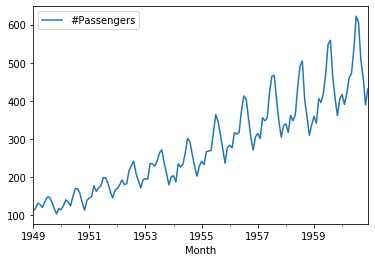

In [68]:
df.plot()

In [69]:
malli = SimpleExpSmoothing(df['#Passengers'].astype('double')).fit()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


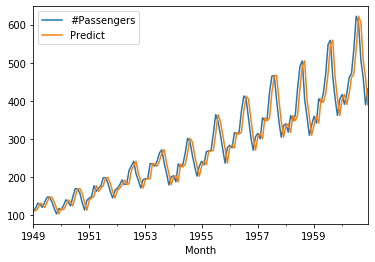

In [70]:
df['Predict'] = malli.fittedvalues
df.plot()

In [71]:
sqrt(mean_squared_error(df['#Passengers'], df['Predict']))

33.59315406448165

In [72]:
mean_absolute_error(df['#Passengers'], df['Predict'])

25.680555555555557

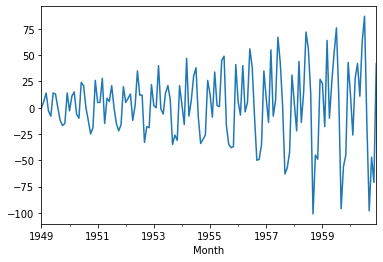

In [73]:
df['Resid'] = malli.resid

df['Resid'].plot()

In [74]:
df.tail()

,#Passengers,Predict,Resid
Month,,,
1960-08-01,606,622.0,-16.0
1960-09-01,508,606.0,-98.0
1960-10-01,461,508.0,-47.0
1960-11-01,390,461.0,-71.0
1960-12-01,432,390.0,42.0


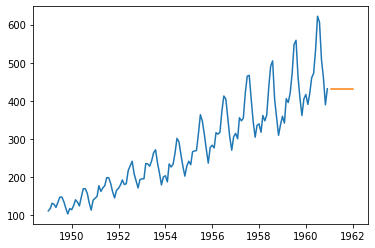

In [79]:
index = pd.date_range('1961-01-01', periods=12, freq='M')

plt.plot(df.index,df['#Passengers'])
plt.plot(index,malli.forecast(12))

In [77]:
malli.params

{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
df

,#Passengers,Predict,Resid
Month,,,
1949-01-01,112,112.0,0.0
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0
1949-06-01,135,121.0,14.0
1949-07-01,148,135.0,13.0
1949-08-01,148,148.0,0.0
1949-09-01,136,148.0,-12.0
